In [1]:
%load_ext autoreload
%autoreload 2
#%aimport deepmars

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import h5py
import os
import dotenv
import os
import tifffile
import deepmars.utils
import deepmars.features.template_match_target as tmt
import cartopy.crs as ccrs
import seaborn as sns


In [3]:
project_dir = os.path.join(os.getcwd(), os.pardir)
dotenv_path = os.path.join(project_dir, '.env')
found = dotenv.load_dotenv(dotenv_path)

In [4]:
print("Loading MOLA")
mola = tifffile.imread(os.path.join(os.getenv("DM_MarsDEM")))


Loading MOLA


In [5]:
num=000
processed_data = os.path.join(os.getenv("DM_ROOTDIR"),"data/processed")
print("Loading Train Images")


Loading Train Images


7


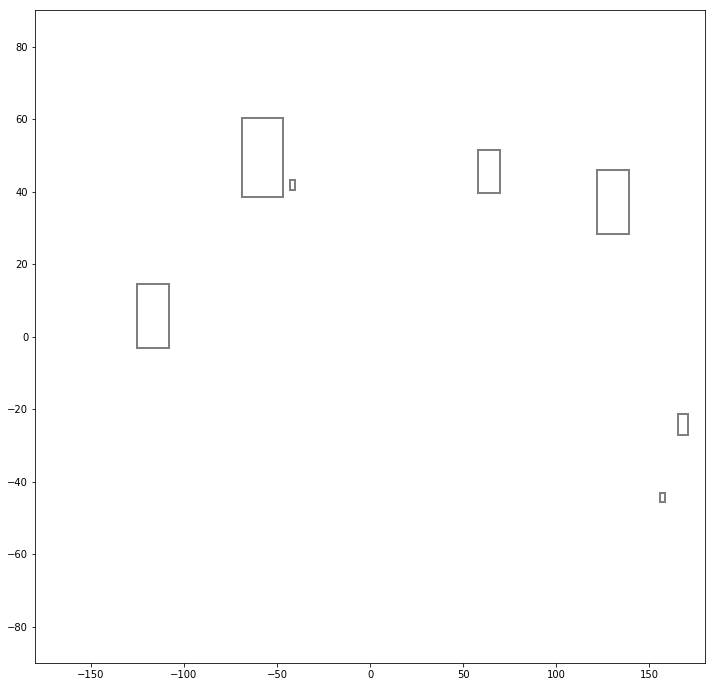

In [6]:
def boxplot(lims,ax,color='black'):
    x=[lims[0],lims[0],lims[1],lims[1]]
    y=[lims[2],lims[3],lims[3],lims[2]]
    sq = plt.Polygon(np.array([x,y]).T,fill=False,color=color,closed=True,linewidth=2,alpha=0.5)
    ax.add_artist(sq)
fig = plt.figure(figsize=(12,12))
ax=fig.gca()

with h5py.File(os.path.join(processed_data, 'ran_images_175000.hdf5'.format(num)), 'r') as h5:
    for k,v in h5["longlat_bounds"].items():
        boxplot(v[:],ax)
    print(len(h5["longlat_bounds"].items()))
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

/Users/lee/Research/DeepLearning/MarsCraters/dm/data/processed/ran_images_175000.hdf5


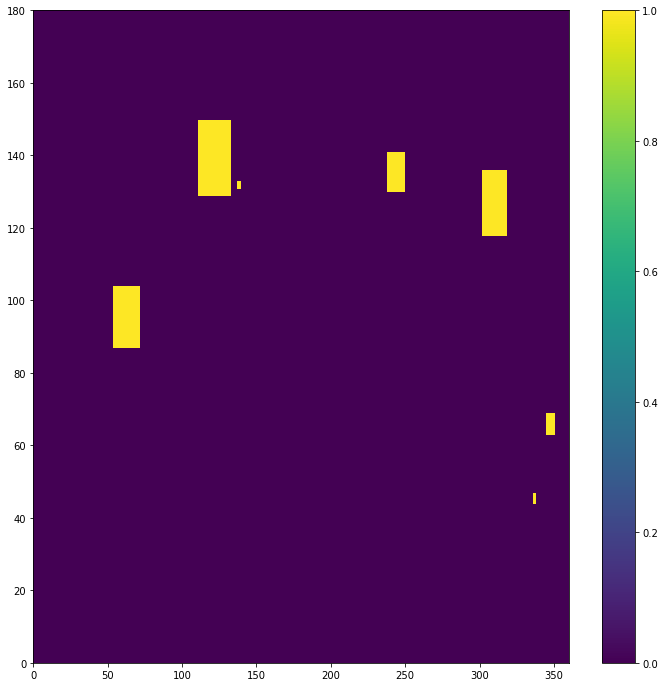

In [10]:
fig = plt.figure(figsize=(12,12))
ax=fig.gca()

lres=0
res=10**(-lres)

cc = sns.color_palette("husl", 8)
output=np.zeros((360//res,180//res))
offset=np.array([output.shape[0]//(2*res),output.shape[0]//(2*res),output.shape[1]//(2*res),output.shape[1]//(2*res)])
res=[]
res2=[]
pxs=[]
import glob
from tqdm import tqdm, tqdm_notebook

for q in sorted(glob.glob(processed_data+"/ran_images_*")):
    print(q)
    h5 = h5py.File(q, 'r')
    for k,v in h5["longlat_bounds"].items():
        px = h5["pix_bounds"][k]
        if px[2]-px[0] >0:
            #pxs.append(px[:])
            res.append(px[2]-px[0])
            res2.append(px[3]-px[1])
            lims=np.round(v,lres).astype(int)+offset
        #print(lims)
            output[lims[0]:lims[1],lims[2]:lims[3]]+=1
    h5.close()
plt.pcolormesh(output.T)
plt.colorbar()
plt.show()


In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.hist(res2,bins=(1+2**(np.arange(16))),rwidth=0.9)
plt.xlabel("image pixel extent")
plt.ylabel("sample size")
plt.subplot(122)
plt.plot(sorted(np.array(res)))
plt.xlabel("image number")
plt.ylabel("image pixel extent")
plt.yscale('log')
plt.show()

In [18]:
res

[5228, 748, 1657, 838, 6484, 3473, 5229]

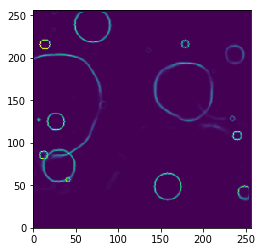

In [208]:
with h5py.File(os.path.join(os.getenv("DM_ROOTDIR"),"data/predictions/sys_preds_160000.hdf5"), 'r') as h5:
    ax=plt.gca()
    ax.pcolormesh(h5["sys"][99])
    ax.set_aspect('equal')#, 'datalim')
    plt.show()